In [7]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [8]:
plt.rcParams["font.family"] = "Comic Sans MS"

In [9]:
# Constants
UNDERSCORE_STR = "_" * 60
DOT_SIZE = 30
DEFAULT_COLOR = "black"
MILESTONE_COLOR = "red"
MILESTONE_SIZE = 20
MULTIPLE = 1.5

# Columns for the DataFrame
COLUMNS = ["time", "title", "description", "color", "size", "is_milestone"]


def create_initial_milestones():
    dates = [dt.datetime(2024, month, 1) for month in range(1, 13)]
    titles = [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ]
    return pd.DataFrame(
        [
            [date, title, UNDERSCORE_STR, DEFAULT_COLOR, DOT_SIZE, False]
            for date, title in zip(dates, titles)
        ],
        columns=COLUMNS,
    )


milestones_df = create_initial_milestones()


def add_milestone(time, title, description, color=MILESTONE_COLOR, size=MILESTONE_SIZE):
    global milestones_df
    new_milestone = pd.DataFrame(
        [[time, title, description, color, size, True]], columns=COLUMNS
    )
    milestones_df = pd.concat([milestones_df, new_milestone])


def plot_milestone():
    global milestones_df
    milestones_df = milestones_df.sort_values(by="time")

    height = (milestones_df.shape[0] + 1) * MULTIPLE
    fig, ax = plt.subplots(figsize=(20, height))

    for index, data in enumerate(milestones_df.itertuples()):
        y_pos = index * MULTIPLE + 1
        ax.text(
            2.25 if data.is_milestone else 2,
            y_pos,
            data.title,
            fontsize=25 if data.is_milestone else 30,
            ha="left",
            va="center",
            fontweight="bold",
        )
        ax.text(
            3,
            y_pos + 0.5 if data.is_milestone else y_pos,
            data.description,
            fontsize=15 if data.is_milestone else 20,
            ha="left",
            va="center",
        )
        ax.plot(1, y_pos, "o", color=data.color, markersize=data.size)

        if data.is_milestone:
            ax.text(
                1.2,
                y_pos,
                data.time.strftime("%d/%m/%y"),
                fontsize=20,
                ha="left",
                va="center",
            )

        if index > 0:
            ax.plot(
                [1, 1],
                [y_pos, (index - 1) * MULTIPLE + 1],
                "r-",
                zorder=-1,
                linewidth=5,
            )

    ax.set_xlim(0, 10)
    ax.set_ylim(height, -1)
    ax.axis("off")
    ax.set_title("The LCKYN Milestones", fontsize=40, fontweight="bold")

    fig.savefig("The LCKYN Milestones.png", format="png", bbox_inches="tight")
    plt.show()


def plot_milestone_dark_mode(darkmode):
    global milestones_df
    milestones_df = milestones_df.sort_values(by="time")

    height = (milestones_df.shape[0] + 1) * MULTIPLE
    fig, ax = plt.subplots(figsize=(20, height))

    # Setting colors from the darkmode dictionary
    fig.patch.set_facecolor(darkmode["background"])
    ax.set_facecolor(darkmode["background"])

    for index, data in enumerate(milestones_df.itertuples()):
        y_pos = index * MULTIPLE + 1

        # Choosing text color based on milestone status
        text_color = (
            darkmode["text_milestone"] if data.is_milestone else darkmode["text"]
        )

        ax.text(
            2.25 if data.is_milestone else 2,
            y_pos,
            data.title,
            fontsize=25 if data.is_milestone else 30,
            ha="left",
            va="center",
            fontweight="bold",
            color=text_color,
        )
        ax.text(
            3,
            y_pos + 0.5 if data.is_milestone else y_pos,
            data.description,
            fontsize=15 if data.is_milestone else 20,
            ha="left",
            va="center",
            color=text_color,
        )

        # Choosing marker color based on milestone status
        marker_color = (
            darkmode["dot_milestone"] if data.is_milestone else darkmode["dot"]
        )
        ax.plot(1, y_pos, "o", color=marker_color, markersize=data.size)

        # Using the specific date text color
        date_text_color = darkmode["text_date"]
        if data.is_milestone:
            ax.text(
                1.2,
                y_pos,
                data.time.strftime("%d/%m/%y"),
                fontsize=20,
                ha="left",
                va="center",
                color=date_text_color,
            )

        if index > 0:
            ax.plot(
                [1, 1],
                [y_pos, (index - 1) * MULTIPLE + 1],
                "-",
                color=darkmode["line"],
                zorder=-1,
                linewidth=5,
            )

    ax.set_xlim(0, 10)
    ax.set_ylim(height, -1)
    ax.axis("off")
    ax.set_title(
        "The LCKYN Milestones", fontsize=40, fontweight="bold", color=darkmode["text"]
    )

    fig.savefig(
        "The LCKYN Milestones Dark Mode.png",
        format="png",
        bbox_inches="tight",
        facecolor=fig.get_facecolor(),
    )
    plt.show()

In [10]:
add_milestone(
    dt.datetime(2024, 1, 1),
    "Milestones Chart",
    """Create a milestone chart to keep track of what happened this year :)""",
    "orange",
    20,
)
add_milestone(
    dt.datetime(2024, 1, 2),
    "Telegram Bot",
    """Create a bot to download all media from Telegram chat group.""",
    "orange",
    20,
)

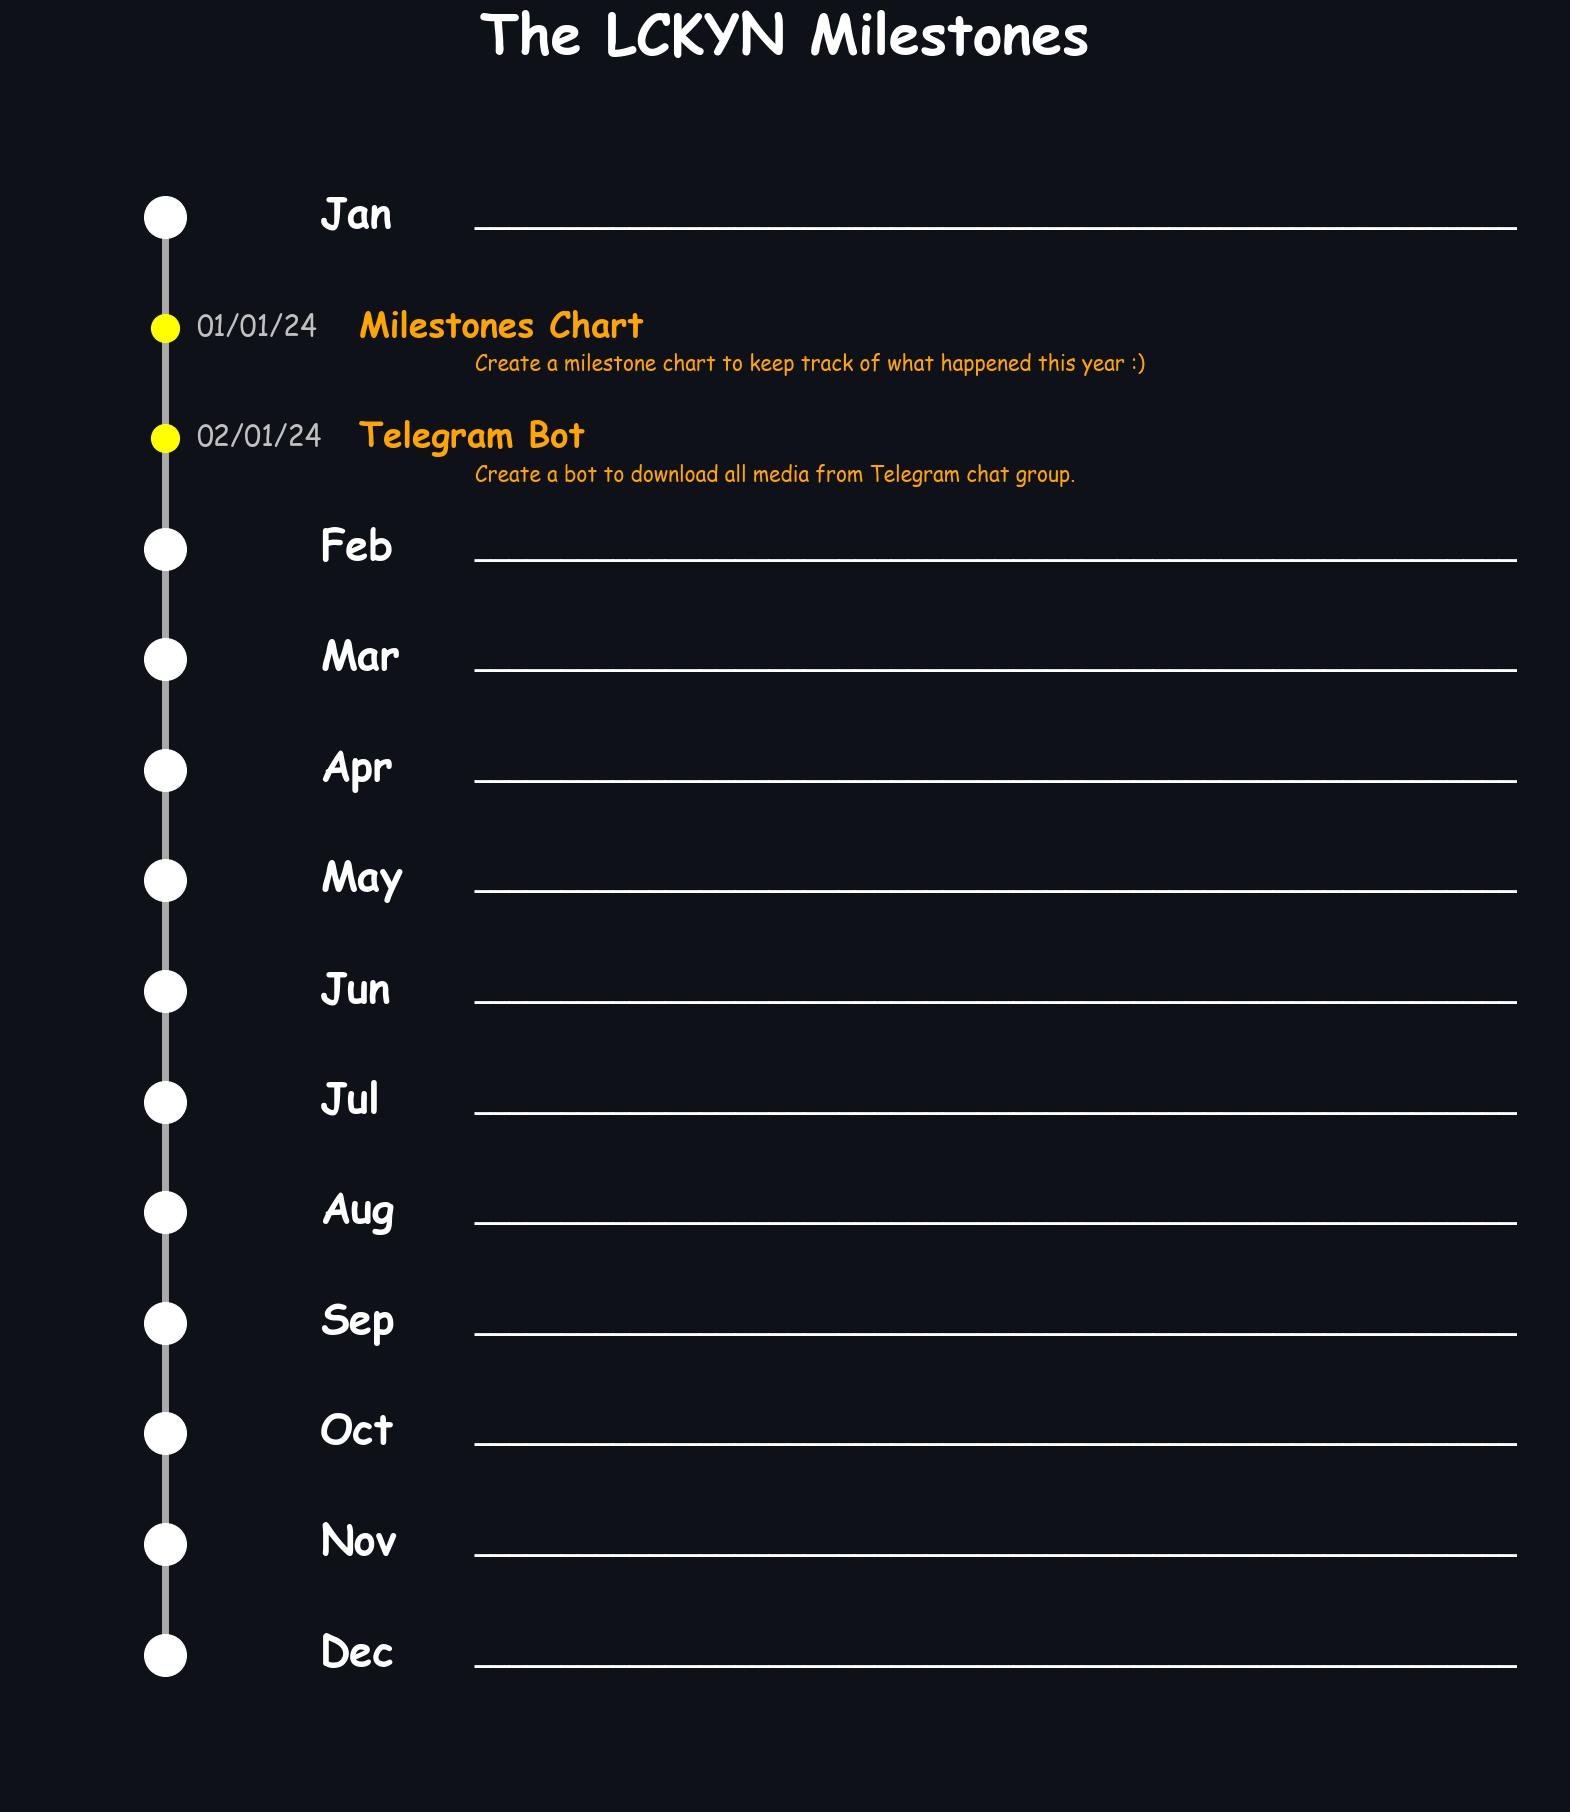

In [11]:
# Example usage
darkmode = {
    "line": "#AAAAAA",
    "dot": "#FFFFFF",
    "dot_milestone": "#FFFF00",
    "text": "#FFFFFF",
    "text_milestone": "#FFA500",
    "text_date": "#C0C0C0",
    "background": "#0e1117",
}

plot_milestone_dark_mode(darkmode)

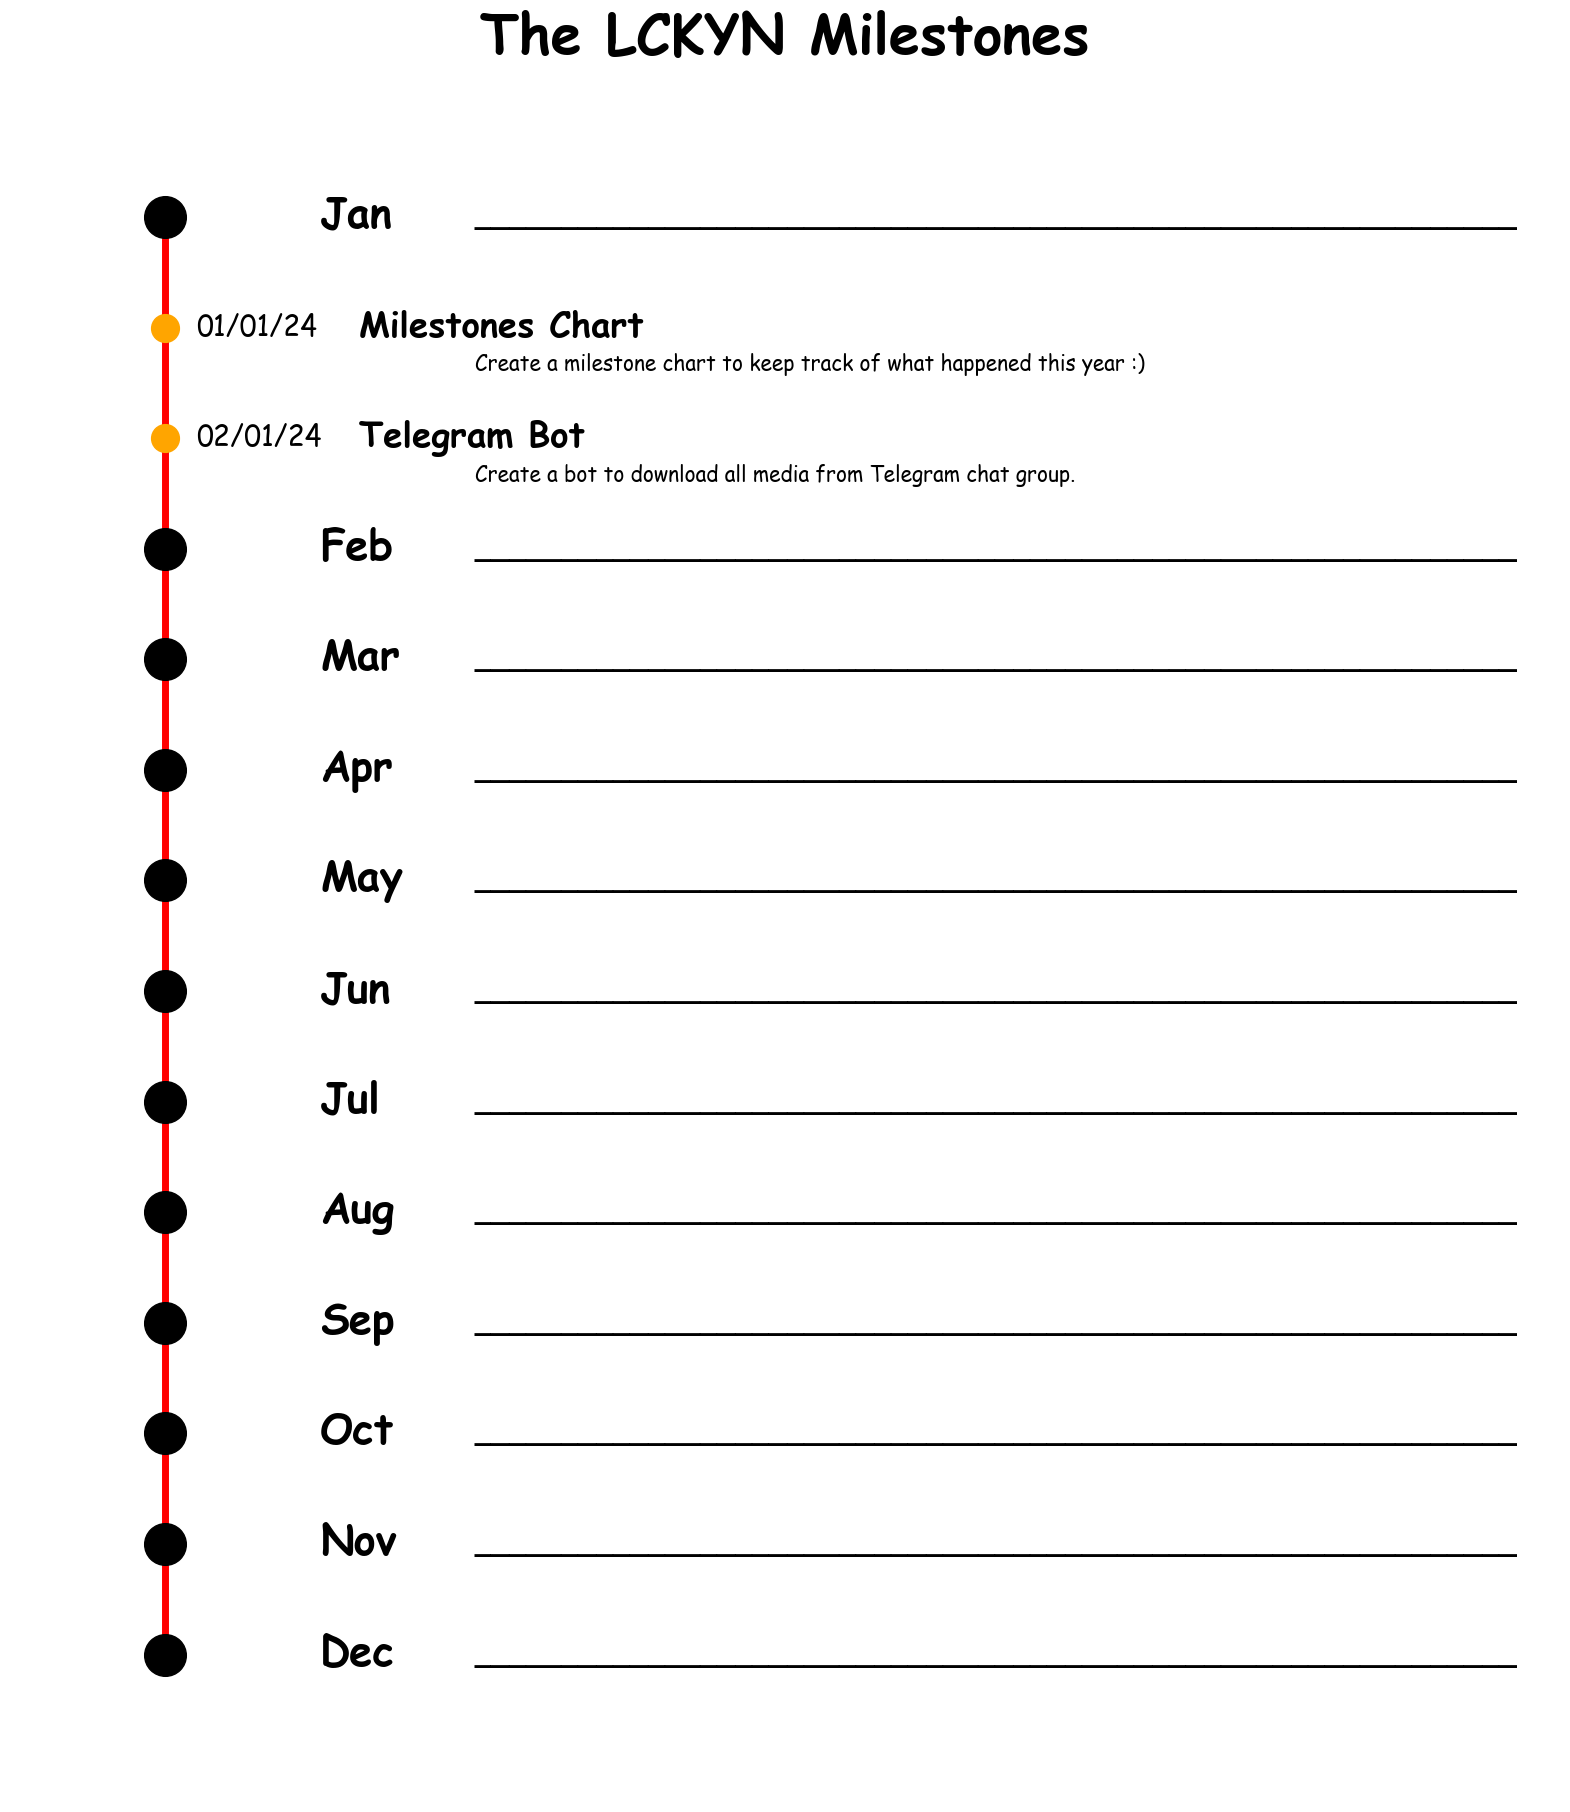

In [12]:
plot_milestone()